In [2]:
import sys
import tensorflow as tf
sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet")
import sd_unet

# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'sd_unet_30ep_512_sG_wo_decay'
INPUT_SHAPE = (512, 512, 1)
RESIZE_SHAPE = (1024, 1024, 1)
MODEL_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/" + FILE_NAME + ".tf"
HISTORY_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/history/" + FILE_NAME + '_history' ".json"

TRAIN_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Train'
TEST_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Test'

2024-01-31 05:22:54.017145: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 05:22:54.017171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 05:22:54.018334: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-31 05:22:54.024004: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-31 05:22:54.585737: W tensorflow/compiler/tf2

In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy,
                  'DropBlock2D': sd_unet.DropBlock2D}


# Create augmentation
train_preproc = preprocess.build_augmentation_for_general(RESIZE_SHAPE[0], RESIZE_SHAPE[0])
test_preproc = preprocess.build_augmentation_for_general(RESIZE_SHAPE[0], RESIZE_SHAPE[0], is_train=False)

# Create train, test generator
train_generator = data_generator.SlicedDataGenerator(
    TRAIN_SOURCE, 
    number_of_images = 1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    resize_shape = RESIZE_SHAPE,
    is_train=True,
    augmentation= train_preproc
)

test_generator = data_generator.SlicedDataGenerator(
    TRAIN_SOURCE,
    number_of_images = 1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    resize_shape = RESIZE_SHAPE,
    is_train=False,
    augmentation= test_preproc
)

# Create model
model = sd_unet.SD_UNet(INPUT_SHAPE)
model.summary()

2024-01-31 05:09:56.824738: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-31 05:09:56.860233: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-31 05:09:56.860436: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 8)          80        ['input_1[0][0]']             
                                                                                                  
 drop_block2d (DropBlock2D)  (None, 512, 512, 8)          524288    ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 512, 512, 8)          0         ['drop_block2d[0][0]']        
                                                                                              

In [3]:
train.model_train(model,
                  epoch = 30,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH,
                  save_every_epoch=True,
                  apply_weight_decay=False)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
2024-01-31 03:59:37.444062: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-31 03:59:39.095896: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3f8d4256f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-31 03:59:39.095919: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2024-01-31 03:59:39.099244: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1706673579.171881  923233 device_compiler.h:186] Compil

880/880 [==============================] - ETA: 0s - loss: 0.6004 - sensitivity: 0.2709 - specificity: 0.9624 - accuracy: 0.9145

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/1--0.6004-0.2709-0.9624-0.3784-0.9875.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/1--0.6004-0.2709-0.9624-0.3784-0.9875.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/1--0.6004-0.2709-0.9624-0.3784-0.9875.pb
880/880 [==============================] - 127s 132ms/step - loss: 0.6004 - sensitivity: 0.2709 - specificity: 0.9624 - accuracy: 0.9145 - val_loss: 0.4684 - val_sensitivity: 0.3784 - val_specificity: 0.9875 - val_accuracy: 0.9452
Epoch 2/30
879/880 [============================>.] - ETA: 0s - loss: 0.4205 - sensitivity: 0.5250 - specificity: 0.9693 - accuracy: 0.9396

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/2--0.4204-0.5253-0.9693-0.4473-0.9880.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/2--0.4204-0.5253-0.9693-0.4473-0.9880.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/2--0.4204-0.5253-0.9693-0.4473-0.9880.pb
880/880 [==============================] - 114s 130ms/step - loss: 0.4204 - sensitivity: 0.5253 - specificity: 0.9693 - accuracy: 0.9396 - val_loss: 0.4084 - val_sensitivity: 0.4473 - val_specificity: 0.9880 - val_accuracy: 0.9507
Epoch 3/30
880/880 [==============================] - ETA: 0s - loss: 0.3782 - sensitivity: 0.5703 - specificity: 0.9719 - accuracy: 0.9453

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/3--0.3782-0.5703-0.9719-0.5285-0.9851.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/3--0.3782-0.5703-0.9719-0.5285-0.9851.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/3--0.3782-0.5703-0.9719-0.5285-0.9851.pb
880/880 [==============================] - 115s 131ms/step - loss: 0.3782 - sensitivity: 0.5703 - specificity: 0.9719 - accuracy: 0.9453 - val_loss: 0.3549 - val_sensitivity: 0.5285 - val_specificity: 0.9851 - val_accuracy: 0.9540
Epoch 4/30
880/880 [==============================] - ETA: 0s - loss: 0.3533 - sensitivity: 0.5988 - specificity: 0.9732 - accuracy: 0.9485

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/4--0.3533-0.5988-0.9732-0.6020-0.9814.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/4--0.3533-0.5988-0.9732-0.6020-0.9814.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/4--0.3533-0.5988-0.9732-0.6020-0.9814.pb
880/880 [==============================] - 115s 130ms/step - loss: 0.3533 - sensitivity: 0.5988 - specificity: 0.9732 - accuracy: 0.9485 - val_loss: 0.3136 - val_sensitivity: 0.6020 - val_specificity: 0.9814 - val_accuracy: 0.9559
Epoch 5/30
879/880 [============================>.] - ETA: 0s - loss: 0.3340 - sensitivity: 0.6188 - specificity: 0.9747 - accuracy: 0.9513

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/5--0.3339-0.6189-0.9747-0.6680-0.9767.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/5--0.3339-0.6189-0.9747-0.6680-0.9767.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/5--0.3339-0.6189-0.9747-0.6680-0.9767.pb
880/880 [==============================] - 115s 130ms/step - loss: 0.3339 - sensitivity: 0.6189 - specificity: 0.9747 - accuracy: 0.9513 - val_loss: 0.2890 - val_sensitivity: 0.6680 - val_specificity: 0.9767 - val_accuracy: 0.9562
Epoch 6/30
880/880 [==============================] - ETA: 0s - loss: 0.3197 - sensitivity: 0.6345 - specificity: 0.9755 - accuracy: 0.9531

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/6--0.3197-0.6345-0.9755-0.6768-0.9782.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/6--0.3197-0.6345-0.9755-0.6768-0.9782.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/6--0.3197-0.6345-0.9755-0.6768-0.9782.pb
880/880 [==============================] - 118s 134ms/step - loss: 0.3197 - sensitivity: 0.6345 - specificity: 0.9755 - accuracy: 0.9531 - val_loss: 0.2781 - val_sensitivity: 0.6768 - val_specificity: 0.9782 - val_accuracy: 0.9580
Epoch 7/30
880/880 [==============================] - ETA: 0s - loss: 0.3100 - sensitivity: 0.6452 - specificity: 0.9762 - accuracy: 0.9546

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/7--0.3100-0.6452-0.9762-0.7012-0.9765.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/7--0.3100-0.6452-0.9762-0.7012-0.9765.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/7--0.3100-0.6452-0.9762-0.7012-0.9765.pb
880/880 [==============================] - 121s 138ms/step - loss: 0.3100 - sensitivity: 0.6452 - specificity: 0.9762 - accuracy: 0.9546 - val_loss: 0.2693 - val_sensitivity: 0.7012 - val_specificity: 0.9765 - val_accuracy: 0.9583
Epoch 8/30
880/880 [==============================] - ETA: 0s - loss: 0.3021 - sensitivity: 0.6533 - specificity: 0.9768 - accuracy: 0.9557

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/8--0.3021-0.6533-0.9768-0.6260-0.9848.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/8--0.3021-0.6533-0.9768-0.6260-0.9848.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/8--0.3021-0.6533-0.9768-0.6260-0.9848.pb
880/880 [==============================] - 115s 130ms/step - loss: 0.3021 - sensitivity: 0.6533 - specificity: 0.9768 - accuracy: 0.9557 - val_loss: 0.2807 - val_sensitivity: 0.6260 - val_specificity: 0.9848 - val_accuracy: 0.9606
Epoch 9/30
879/880 [============================>.] - ETA: 0s - loss: 0.2964 - sensitivity: 0.6596 - specificity: 0.9773 - accuracy: 0.9565

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/9--0.2963-0.6598-0.9773-0.7353-0.9737.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/9--0.2963-0.6598-0.9773-0.7353-0.9737.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/9--0.2963-0.6598-0.9773-0.7353-0.9737.pb
880/880 [==============================] - 122s 138ms/step - loss: 0.2963 - sensitivity: 0.6598 - specificity: 0.9773 - accuracy: 0.9565 - val_loss: 0.2634 - val_sensitivity: 0.7353 - val_specificity: 0.9737 - val_accuracy: 0.9580
Epoch 10/30
880/880 [==============================] - ETA: 0s - loss: 0.2908 - sensitivity: 0.6660 - specificity: 0.9776 - accuracy: 0.9573

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/10--0.2908-0.6660-0.9776-0.7320-0.9749.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/10--0.2908-0.6660-0.9776-0.7320-0.9749.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/10--0.2908-0.6660-0.9776-0.7320-0.9749.pb
880/880 [==============================] - 115s 130ms/step - loss: 0.2908 - sensitivity: 0.6660 - specificity: 0.9776 - accuracy: 0.9573 - val_loss: 0.2602 - val_sensitivity: 0.7320 - val_specificity: 0.9749 - val_accuracy: 0.9588
Epoch 11/30
880/880 [==============================] - ETA: 0s - loss: 0.2874 - sensitivity: 0.6720 - specificity: 0.9775 - accuracy: 0.9575

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/11--0.2874-0.6720-0.9775-0.7001-0.9797.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/11--0.2874-0.6720-0.9775-0.7001-0.9797.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/11--0.2874-0.6720-0.9775-0.7001-0.9797.pb
880/880 [==============================] - 121s 138ms/step - loss: 0.2874 - sensitivity: 0.6720 - specificity: 0.9775 - accuracy: 0.9575 - val_loss: 0.2550 - val_sensitivity: 0.7001 - val_specificity: 0.9797 - val_accuracy: 0.9611
Epoch 12/30
879/880 [============================>.] - ETA: 0s - loss: 0.2833 - sensitivity: 0.6757 - specificity: 0.9779 - accuracy: 0.9582

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/12--0.2834-0.6757-0.9779-0.7020-0.9803.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/12--0.2834-0.6757-0.9779-0.7020-0.9803.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/12--0.2834-0.6757-0.9779-0.7020-0.9803.pb
880/880 [==============================] - 120s 137ms/step - loss: 0.2834 - sensitivity: 0.6757 - specificity: 0.9779 - accuracy: 0.9582 - val_loss: 0.2525 - val_sensitivity: 0.7020 - val_specificity: 0.9803 - val_accuracy: 0.9618
Epoch 13/30
879/880 [============================>.] - ETA: 0s - loss: 0.2797 - sensitivity: 0.6806 - specificity: 0.9780 - accuracy: 0.9586

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/13--0.2798-0.6808-0.9780-0.7444-0.9752.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/13--0.2798-0.6808-0.9780-0.7444-0.9752.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/13--0.2798-0.6808-0.9780-0.7444-0.9752.pb
880/880 [==============================] - 123s 140ms/step - loss: 0.2798 - sensitivity: 0.6808 - specificity: 0.9780 - accuracy: 0.9586 - val_loss: 0.2512 - val_sensitivity: 0.7444 - val_specificity: 0.9752 - val_accuracy: 0.9600
Epoch 14/30
880/880 [==============================] - ETA: 0s - loss: 0.2768 - sensitivity: 0.6848 - specificity: 0.9781 - accuracy: 0.9590

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/14--0.2768-0.6848-0.9781-0.7726-0.9710.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/14--0.2768-0.6848-0.9781-0.7726-0.9710.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/14--0.2768-0.6848-0.9781-0.7726-0.9710.pb
880/880 [==============================] - 116s 132ms/step - loss: 0.2768 - sensitivity: 0.6848 - specificity: 0.9781 - accuracy: 0.9590 - val_loss: 0.2541 - val_sensitivity: 0.7726 - val_specificity: 0.9710 - val_accuracy: 0.9581
Epoch 15/30
879/880 [============================>.] - ETA: 0s - loss: 0.2733 - sensitivity: 0.6892 - specificity: 0.9782 - accuracy: 0.9594

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/15--0.2732-0.6893-0.9782-0.7476-0.9760.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/15--0.2732-0.6893-0.9782-0.7476-0.9760.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/15--0.2732-0.6893-0.9782-0.7476-0.9760.pb
880/880 [==============================] - 119s 135ms/step - loss: 0.2732 - sensitivity: 0.6893 - specificity: 0.9782 - accuracy: 0.9594 - val_loss: 0.2466 - val_sensitivity: 0.7476 - val_specificity: 0.9760 - val_accuracy: 0.9610
Epoch 16/30
880/880 [==============================] - ETA: 0s - loss: 0.2719 - sensitivity: 0.6907 - specificity: 0.9784 - accuracy: 0.9597

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/16--0.2719-0.6907-0.9784-0.7101-0.9810.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/16--0.2719-0.6907-0.9784-0.7101-0.9810.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/16--0.2719-0.6907-0.9784-0.7101-0.9810.pb
880/880 [==============================] - 115s 130ms/step - loss: 0.2719 - sensitivity: 0.6907 - specificity: 0.9784 - accuracy: 0.9597 - val_loss: 0.2449 - val_sensitivity: 0.7101 - val_specificity: 0.9810 - val_accuracy: 0.9630
Epoch 17/30
880/880 [==============================] - ETA: 0s - loss: 0.2686 - sensitivity: 0.6944 - specificity: 0.9787 - accuracy: 0.9602

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/17--0.2686-0.6944-0.9787-0.7576-0.9755.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/17--0.2686-0.6944-0.9787-0.7576-0.9755.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/17--0.2686-0.6944-0.9787-0.7576-0.9755.pb
880/880 [==============================] - 114s 130ms/step - loss: 0.2686 - sensitivity: 0.6944 - specificity: 0.9787 - accuracy: 0.9602 - val_loss: 0.2422 - val_sensitivity: 0.7576 - val_specificity: 0.9755 - val_accuracy: 0.9612
Epoch 18/30
880/880 [==============================] - ETA: 0s - loss: 0.2666 - sensitivity: 0.6977 - specificity: 0.9785 - accuracy: 0.9603

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/18--0.2666-0.6977-0.9785-0.7744-0.9730.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/18--0.2666-0.6977-0.9785-0.7744-0.9730.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/18--0.2666-0.6977-0.9785-0.7744-0.9730.pb
880/880 [==============================] - 118s 134ms/step - loss: 0.2666 - sensitivity: 0.6977 - specificity: 0.9785 - accuracy: 0.9603 - val_loss: 0.2443 - val_sensitivity: 0.7744 - val_specificity: 0.9730 - val_accuracy: 0.9601
Epoch 19/30
880/880 [==============================] - ETA: 0s - loss: 0.2656 - sensitivity: 0.6998 - specificity: 0.9786 - accuracy: 0.9605

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/19--0.2656-0.6998-0.9786-0.7520-0.9770.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/19--0.2656-0.6998-0.9786-0.7520-0.9770.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/19--0.2656-0.6998-0.9786-0.7520-0.9770.pb
880/880 [==============================] - 115s 131ms/step - loss: 0.2656 - sensitivity: 0.6998 - specificity: 0.9786 - accuracy: 0.9605 - val_loss: 0.2394 - val_sensitivity: 0.7520 - val_specificity: 0.9770 - val_accuracy: 0.9622
Epoch 20/30
879/880 [============================>.] - ETA: 0s - loss: 0.2627 - sensitivity: 0.7029 - specificity: 0.9788 - accuracy: 0.9609

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/20--0.2628-0.7028-0.9788-0.7093-0.9821.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/20--0.2628-0.7028-0.9788-0.7093-0.9821.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/20--0.2628-0.7028-0.9788-0.7093-0.9821.pb
880/880 [==============================] - 121s 138ms/step - loss: 0.2628 - sensitivity: 0.7028 - specificity: 0.9788 - accuracy: 0.9609 - val_loss: 0.2395 - val_sensitivity: 0.7093 - val_specificity: 0.9821 - val_accuracy: 0.9638
Epoch 21/30
879/880 [============================>.] - ETA: 0s - loss: 0.2608 - sensitivity: 0.7043 - specificity: 0.9791 - accuracy: 0.9613

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/21--0.2608-0.7043-0.9791-0.7846-0.9722.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/21--0.2608-0.7043-0.9791-0.7846-0.9722.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/21--0.2608-0.7043-0.9791-0.7846-0.9722.pb
880/880 [==============================] - 114s 129ms/step - loss: 0.2608 - sensitivity: 0.7043 - specificity: 0.9791 - accuracy: 0.9613 - val_loss: 0.2431 - val_sensitivity: 0.7846 - val_specificity: 0.9722 - val_accuracy: 0.9599
Epoch 22/30
879/880 [============================>.] - ETA: 0s - loss: 0.2594 - sensitivity: 0.7066 - specificity: 0.9789 - accuracy: 0.9613

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/22--0.2594-0.7067-0.9789-0.7692-0.9754.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/22--0.2594-0.7067-0.9789-0.7692-0.9754.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/22--0.2594-0.7067-0.9789-0.7692-0.9754.pb
880/880 [==============================] - 116s 132ms/step - loss: 0.2594 - sensitivity: 0.7067 - specificity: 0.9789 - accuracy: 0.9613 - val_loss: 0.2374 - val_sensitivity: 0.7692 - val_specificity: 0.9754 - val_accuracy: 0.9618
Epoch 23/30
879/880 [============================>.] - ETA: 0s - loss: 0.2582 - sensitivity: 0.7091 - specificity: 0.9790 - accuracy: 0.9615

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/23--0.2581-0.7092-0.9790-0.7665-0.9763.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/23--0.2581-0.7092-0.9790-0.7665-0.9763.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/23--0.2581-0.7092-0.9790-0.7665-0.9763.pb
880/880 [==============================] - 119s 136ms/step - loss: 0.2581 - sensitivity: 0.7092 - specificity: 0.9790 - accuracy: 0.9615 - val_loss: 0.2349 - val_sensitivity: 0.7665 - val_specificity: 0.9763 - val_accuracy: 0.9625
Epoch 24/30
880/880 [==============================] - ETA: 0s - loss: 0.2563 - sensitivity: 0.7103 - specificity: 0.9793 - accuracy: 0.9619

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/24--0.2563-0.7103-0.9793-0.7970-0.9708.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/24--0.2563-0.7103-0.9793-0.7970-0.9708.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/24--0.2563-0.7103-0.9793-0.7970-0.9708.pb
880/880 [==============================] - 119s 135ms/step - loss: 0.2563 - sensitivity: 0.7103 - specificity: 0.9793 - accuracy: 0.9619 - val_loss: 0.2423 - val_sensitivity: 0.7970 - val_specificity: 0.9708 - val_accuracy: 0.9596
Epoch 25/30
879/880 [============================>.] - ETA: 0s - loss: 0.2544 - sensitivity: 0.7138 - specificity: 0.9792 - accuracy: 0.9621

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/25--0.2544-0.7138-0.9792-0.7868-0.9734.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/25--0.2544-0.7138-0.9792-0.7868-0.9734.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/25--0.2544-0.7138-0.9792-0.7868-0.9734.pb
880/880 [==============================] - 116s 132ms/step - loss: 0.2544 - sensitivity: 0.7138 - specificity: 0.9792 - accuracy: 0.9621 - val_loss: 0.2371 - val_sensitivity: 0.7868 - val_specificity: 0.9734 - val_accuracy: 0.9612
Epoch 26/30
879/880 [============================>.] - ETA: 0s - loss: 0.2536 - sensitivity: 0.7144 - specificity: 0.9794 - accuracy: 0.9622

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/26--0.2536-0.7143-0.9794-0.7761-0.9753.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/26--0.2536-0.7143-0.9794-0.7761-0.9753.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/26--0.2536-0.7143-0.9794-0.7761-0.9753.pb
880/880 [==============================] - 118s 135ms/step - loss: 0.2536 - sensitivity: 0.7143 - specificity: 0.9794 - accuracy: 0.9622 - val_loss: 0.2344 - val_sensitivity: 0.7761 - val_specificity: 0.9753 - val_accuracy: 0.9622
Epoch 27/30
880/880 [==============================] - ETA: 0s - loss: 0.2533 - sensitivity: 0.7162 - specificity: 0.9791 - accuracy: 0.9621

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/27--0.2533-0.7162-0.9791-0.7551-0.9786.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/27--0.2533-0.7162-0.9791-0.7551-0.9786.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/27--0.2533-0.7162-0.9791-0.7551-0.9786.pb
880/880 [==============================] - 114s 129ms/step - loss: 0.2533 - sensitivity: 0.7162 - specificity: 0.9791 - accuracy: 0.9621 - val_loss: 0.2316 - val_sensitivity: 0.7551 - val_specificity: 0.9786 - val_accuracy: 0.9637
Epoch 28/30
880/880 [==============================] - ETA: 0s - loss: 0.2514 - sensitivity: 0.7174 - specificity: 0.9795 - accuracy: 0.9625

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/28--0.2514-0.7174-0.9795-0.7498-0.9797.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/28--0.2514-0.7174-0.9795-0.7498-0.9797.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/28--0.2514-0.7174-0.9795-0.7498-0.9797.pb
880/880 [==============================] - 124s 141ms/step - loss: 0.2514 - sensitivity: 0.7174 - specificity: 0.9795 - accuracy: 0.9625 - val_loss: 0.2294 - val_sensitivity: 0.7498 - val_specificity: 0.9797 - val_accuracy: 0.9645
Epoch 29/30
880/880 [==============================] - ETA: 0s - loss: 0.2504 - sensitivity: 0.7193 - specificity: 0.9794 - accuracy: 0.9626

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/29--0.2504-0.7193-0.9794-0.7828-0.9751.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/29--0.2504-0.7193-0.9794-0.7828-0.9751.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/29--0.2504-0.7193-0.9794-0.7828-0.9751.pb
880/880 [==============================] - 120s 136ms/step - loss: 0.2504 - sensitivity: 0.7193 - specificity: 0.9794 - accuracy: 0.9626 - val_loss: 0.2310 - val_sensitivity: 0.7828 - val_specificity: 0.9751 - val_accuracy: 0.9626
Epoch 30/30
880/880 [==============================] - ETA: 0s - loss: 0.2494 - sensitivity: 0.7200 - specificity: 0.9795 - accuracy: 0.9628

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will b

INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/30--0.2494-0.7200-0.9795-0.8118-0.9691.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/30--0.2494-0.7200-0.9795-0.8118-0.9691.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/30--0.2494-0.7200-0.9795-0.8118-0.9691.pb
880/880 [==============================] - 119s 135ms/step - loss: 0.2494 - sensitivity: 0.7200 - specificity: 0.9795 - accuracy: 0.9628 - val_loss: 0.2413 - val_sensitivity: 0.8118 - val_specificity: 0.9691 - val_accuracy: 0.9590


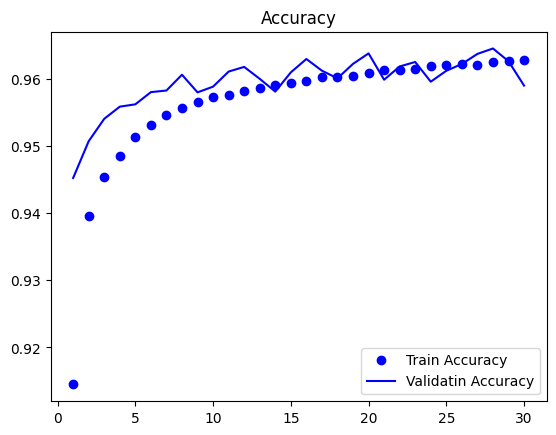

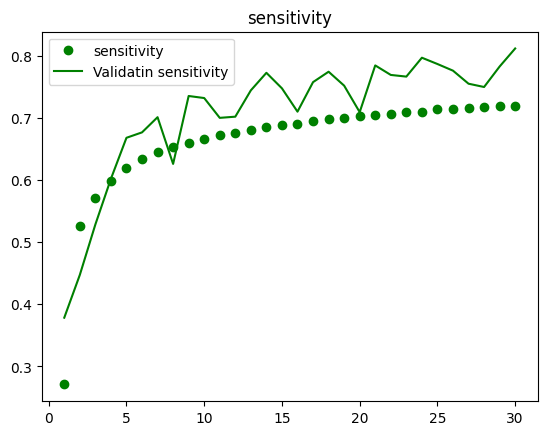

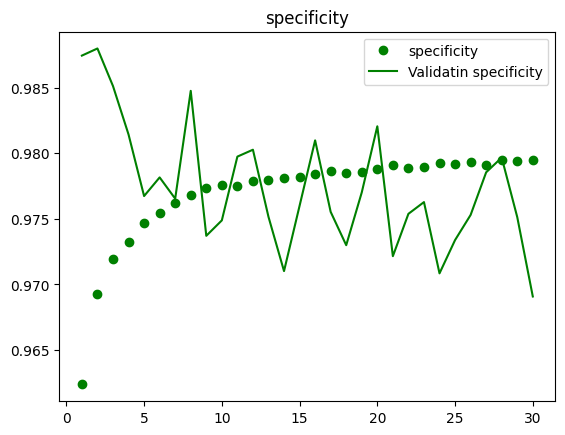

<Figure size 640x480 with 0 Axes>

In [4]:
check_result.plot_history(HISTORY_PATH)

In [3]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy}

test_preproc = preprocess.build_augmentation_for_general(RESIZE_SHAPE[0], RESIZE_SHAPE[0], is_train=False)
test_generator = data_generator.SlicedDataGenerator(
    TRAIN_SOURCE,
    number_of_images = 1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    resize_shape = RESIZE_SHAPE,
    is_train=False,
    augmentation= test_preproc
)
# Load the model with custom_objects parameter
MODEL_PATH = '/visuworks/Blindless_AIFFELTON/Ablation Study/SD_Unet/model_parameters/sd_unet_30ep_512_sG_wo_decay.tf/30--0.2494-0.7200-0.9795-0.8118-0.9691.pb'
model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)

metrics.print_evaluation(model, test_generator)

2024-01-31 05:23:03.650727: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-31 05:23:03.685998: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-31 05:23:03.686201: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

500/500 [==============================] - 41s 78ms/step - loss: 0.2435 - sensitivity: 0.8140 - specificity: 0.9687 - accuracy: 0.9589
Loss: 0.24352332949638367
Sensitivity: 0.8140193819999695
Specificity: 0.9687013626098633
Accuracy: 0.9589313268661499
